# Final Year Project - Intelligent Health Monitoring System
#### by: Koo Chia Meng, A0165275Y

### DATA ANALYSIS
### Correlation in Health Improvements:
### Sleep (Duration,Efficiency,Timing) VS HRV

The following will be done in this Notebook:
1. Exploring the correlation between the parameters given by health trackers and improvement in health.
    - The difference in sleep (Duration,Efficiency,Timing) are correlated with the improve in Heart Health (HRV)?
        
2. How to justify Health improvements:
    - Decrease / increase in certain heatlth indicators as used in multiple health studies.

### Importing both person data

In [2]:
#Import relevant Dependencies

import datetime
import time
import pandas as pd # Pandas Version 1.0.5
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import stats as sps
import sklearn.linear_model as lm
import seaborn as sns # use for visualising
import os

In [3]:
%run FYP_SUBJECTS_CLASS.ipynb # line needed to reuse the SUBJECT class created for OOP

### Loading Subjects from PICKLE

In [4]:
current_directory = os.getcwd()
folder = "PERSON1" # CHANGE HERE
file = "PERSON1_DATA_31JUL.pickle" # CHANGE HERE
f_path = os.path.join(current_directory,folder,file)
                      
with open(f_path,'rb') as f:
    PERSON1 = pickle.load(file=f)

In [5]:
PERSON1.profile

{'age': 28, 'gender': 'MALE', 'height': 170.0, 'weight': 75.0}

In [6]:
current_directory = os.getcwd()
folder = "PERSON2" # CHANGE HERE
file = "PERSON2_DATA_31JUL.pickle" # CHANGE HERE
f_path = os.path.join(current_directory,folder,file)
                      
with open(f_path,'rb') as f:
    PERSON2 = pickle.load(file=f)

In [7]:
PERSON2.profile

{'age': 27, 'gender': 'MALE', 'height': 176.0, 'weight': 65.0}

### Loading Previously Processed DFs from PICKLE

In [8]:
current_directory = os.getcwd()
folder = os.path.join("PERSON1","31JUL") # CHANGE HERE
folder_path = os.path.join(current_directory,folder)

# LOAD FROM PICKLE:

unpickle = {}
unpickle_list = [
                # Daily Resting Heart Rate DF:
                'df_resting_hr',

                # Daily Heart Rate Zones (HR Activities) DF:
                'df_hr_calories',

                # Intra-day Heart Rate DF:
                'df_intraday_hr',

                # Sleep Durations DF
                'df_sleep_durations',

                # Detailed intra Sleep Stages DF
                'df_intra_sleep_stage',

                # Daily Step activities DF:
                'df_activity_steps',
    
                # Derived HRV Stats DFs:
                'df_hrv_stats_full_day',
                'df_hrv_stats_AM',
                'df_hrv_stats_PM'
]

for i in unpickle_list:
    file = os.path.join(folder_path, str(i) + '.pickle')
    with open(file,'rb') as f:
        unpickle[i] = pickle.load(file=f)

PERSON1.df_resting_hr = unpickle['df_resting_hr']
PERSON1.df_hr_calories = unpickle['df_hr_calories']
PERSON1.df_intraday_hr = unpickle['df_intraday_hr']
PERSON1.df_sleep_durations = unpickle['df_sleep_durations']
PERSON1.df_intra_sleep_stage = unpickle['df_intra_sleep_stage']
PERSON1.df_activity_steps = unpickle['df_activity_steps']
PERSON1.df_hrv_stats_full_day = unpickle['df_hrv_stats_full_day']
PERSON1.df_hrv_stats_AM = unpickle['df_hrv_stats_AM']
PERSON1.df_hrv_stats_PM = unpickle['df_hrv_stats_PM']


In [9]:
current_directory = os.getcwd()
folder = os.path.join("PERSON2","31JUL") # CHANGE HERE
folder_path = os.path.join(current_directory,folder)

# LOAD FROM PICKLE:

unpickle = {}
unpickle_list = [
                # Daily Resting Heart Rate DF:
                'df_resting_hr',

                # Daily Heart Rate Zones (HR Activities) DF:
                'df_hr_calories',

                # Intra-day Heart Rate DF:
                'df_intraday_hr',

                # Sleep Durations DF
                'df_sleep_durations',

                # Detailed intra Sleep Stages DF
                'df_intra_sleep_stage',

                # Daily Step activities DF:
                'df_activity_steps',
    
                # Derived HRV Stats DFs:
                'df_hrv_stats_full_day',
                'df_hrv_stats_AM',
                'df_hrv_stats_PM'
]

for i in unpickle_list:
    file = os.path.join(folder_path, str(i) + '.pickle')
    with open(file,'rb') as f:
        unpickle[i] = pickle.load(file=f)

PERSON2.df_resting_hr = unpickle['df_resting_hr']
PERSON2.df_hr_calories = unpickle['df_hr_calories']
PERSON2.df_intraday_hr = unpickle['df_intraday_hr']
PERSON2.df_sleep_durations = unpickle['df_sleep_durations']
PERSON2.df_intra_sleep_stage = unpickle['df_intra_sleep_stage']
PERSON2.df_activity_steps = unpickle['df_activity_steps']
PERSON2.df_hrv_stats_full_day = unpickle['df_hrv_stats_full_day']
PERSON2.df_hrv_stats_AM = unpickle['df_hrv_stats_AM']
PERSON2.df_hrv_stats_PM = unpickle['df_hrv_stats_PM']

In [10]:
PERSON_LIST = [PERSON1,PERSON2] # Declare a list of person to create

### CORRELATION PLOTS

In [11]:
hrv_cols = ['Mean_PP_interval','PP_interval_range',
            'SD_PP_interval','SD_PP_5min','RMS_PP_diff',
            'Max_PP_1st_dydt','Max_PP_2nd_dydt']

sleep_cols = ['duration','efficiency','startTime']


PERSON 1: 


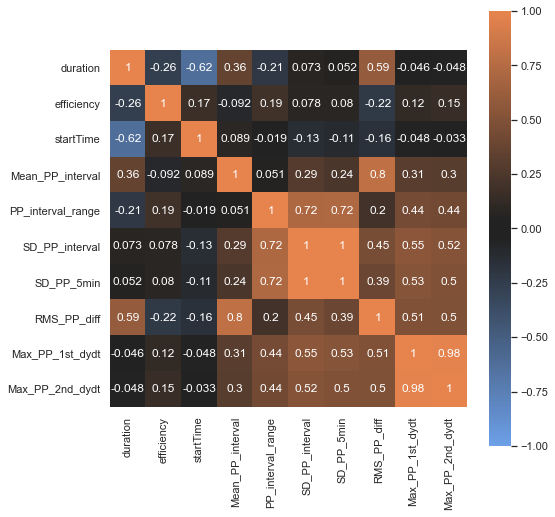


PERSON 2: 


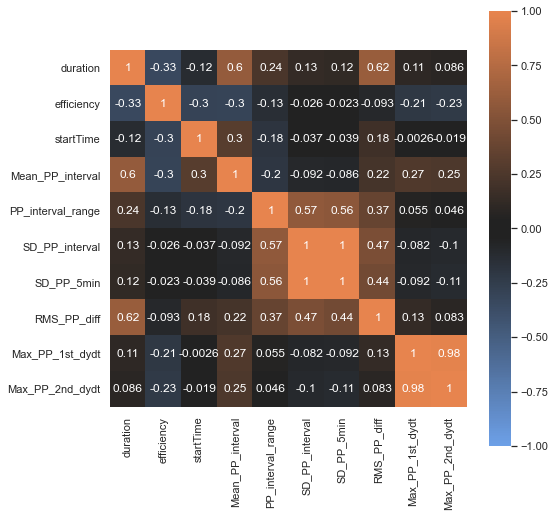

In [12]:
for i, subject in enumerate(PERSON_LIST):
    
    # Check if Start Time is on the same day of DateOfSleep:
    check = subject.df_sleep_durations.startTime >= pd.DatetimeIndex(subject.df_sleep_durations.index)

    # minus 24h if start time is not the DateOfSleep:
    hour_of_sleep = subject.df_sleep_durations[~check].startTime.dt.hour - 24.0
    hour_of_sleep = pd.concat([hour_of_sleep,subject.df_sleep_durations[check].startTime.dt.hour])

    subject.df_sleep_durations['startTime'] = hour_of_sleep.sort_index() + subject.df_sleep_durations.startTime.sort_index().dt.minute / 60.0

    
    print('\nPERSON {}:'.format(i+1),'\n'+'='*10)
    
    DATA = pd.concat([subject.df_sleep_durations[sleep_cols],subject.df_hrv_stats_full_day[hrv_cols]]
                    , axis=1)
 
    sns.set(rc={'figure.figsize':(8,8)})

    CMAP = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True) # define the color scheme

    sns.heatmap(DATA.corr(),vmin=-1.0,vmax=1.0,cmap=CMAP,annot=True, square=True)

    plt.show()


From the Heat map above, it is shown that the sleep duration showed the most significant correlations and is positivly correlated with: 
- Mean PP interval
- RMS of Succesive Difference

The rest of the correlations were of mixed results, is Positive for one and Negative for the other person.

#### Using Z-Score to Find Outliers

In [13]:
# Z Score can be used to find outliers if the data is a normal distribution:
# if z-score value is more than 3, the point is most likely an outlier.
# Zscore tells us how far away (in the ratio of SD) the record is away from the mean.

list_plot = [] # define empt list to store DF for plotting later.

for i, subject in enumerate(PERSON_LIST): # applying the same steps for PERSON1 and PERSON2.
    for col in hrv_cols:
        # INPUT X & Y SERIES:
        x_plot = subject.df_sleep_durations.duration.sort_index().copy()
        y_plot = subject.df_hrv_stats_full_day[col].copy()

        # Finding Z-Score & Setting Date as index:
        x_plot = pd.concat([x_plot.reset_index(),pd.Series(sps.zscore(x_plot))],axis=1)
        x_plot = x_plot.rename(columns={0:'z_score'}).set_index('dateOfSleep')

        y_plot = pd.concat([y_plot.reset_index(),pd.Series(sps.zscore(y_plot))],axis=1)
        y_plot = y_plot.rename(columns={0:'z_score'}).set_index('date')

        new_x_plot = x_plot[(x_plot.z_score<=3) & (x_plot.z_score>=-3)]
        new_y_plot = y_plot[(y_plot.z_score<=3) & (y_plot.z_score>=-3)]

        # Match all points and Save into Dict to prep for Seaborn plotting:
        DATA_after = pd.concat([new_x_plot.drop(columns=['z_score']),new_y_plot.drop(columns=['z_score'])],axis=1).dropna()

        list_plot.append(DATA_after)


PERSON 1: 


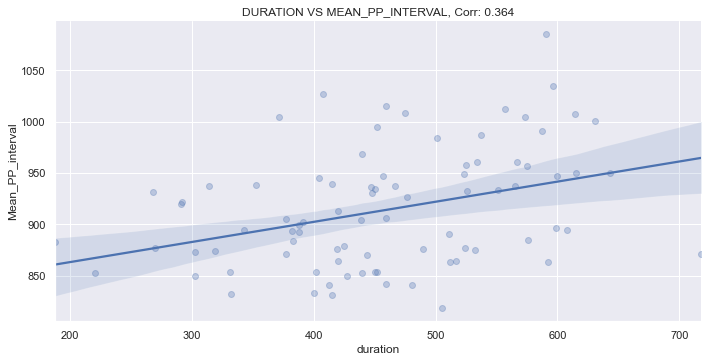

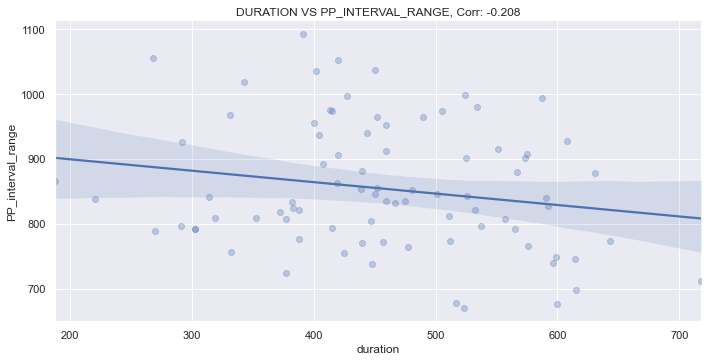

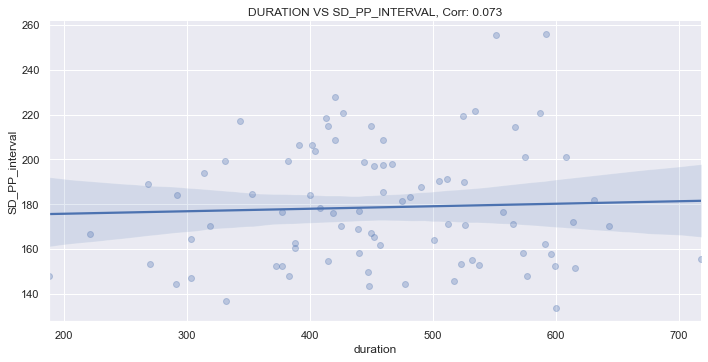

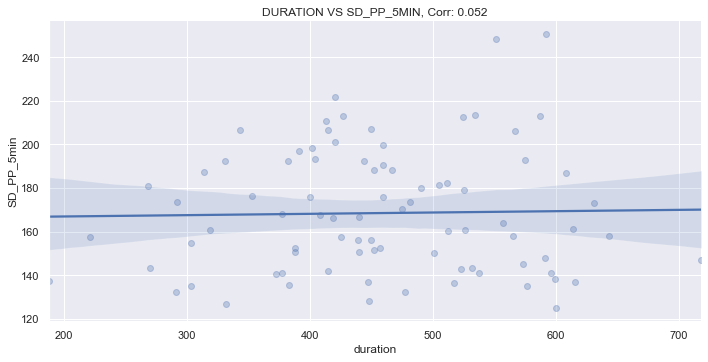

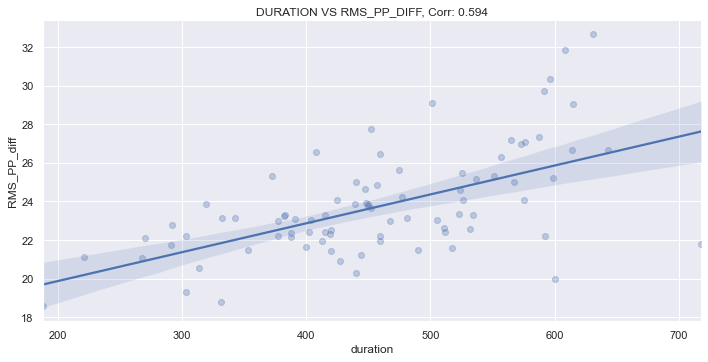

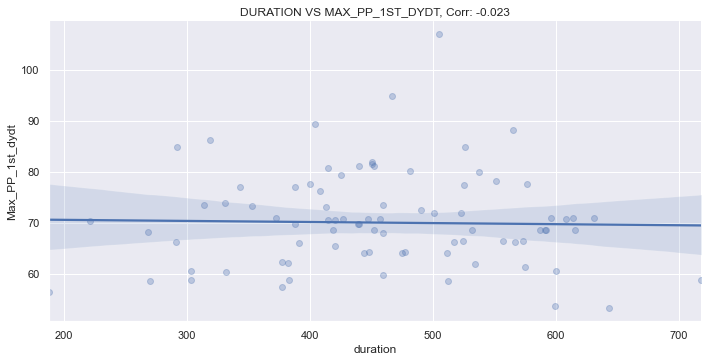

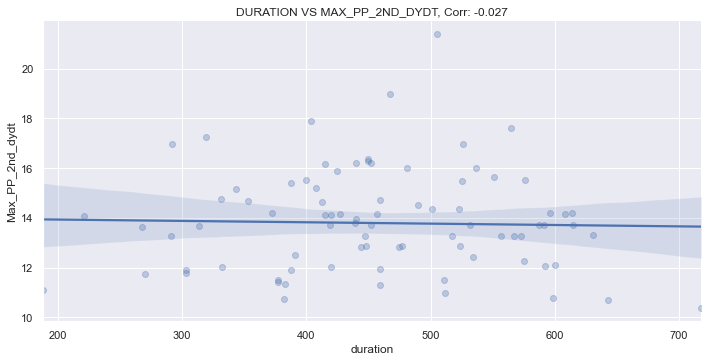


PERSON 2: 


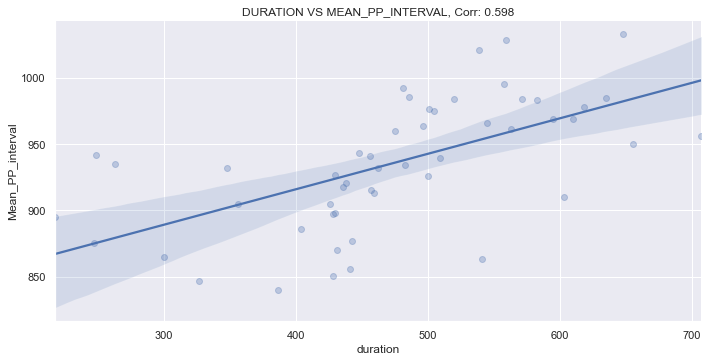

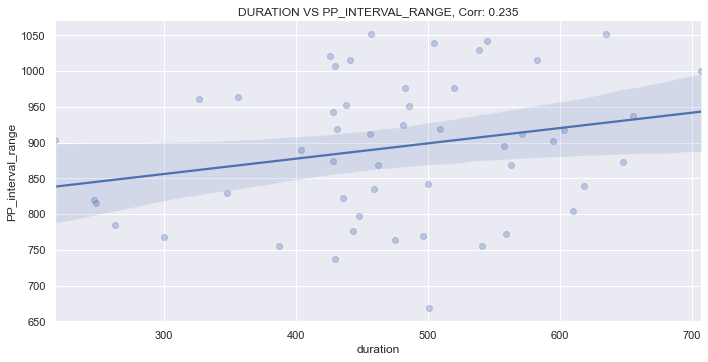

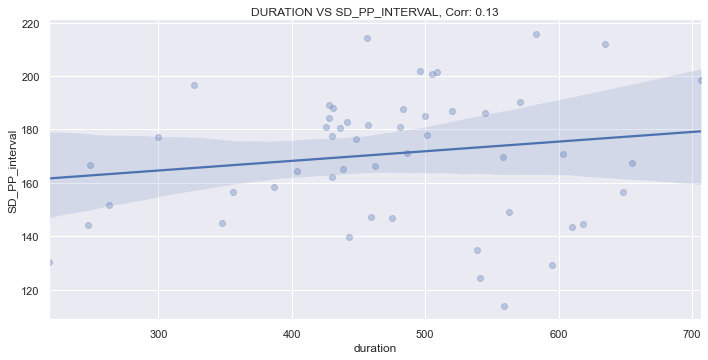

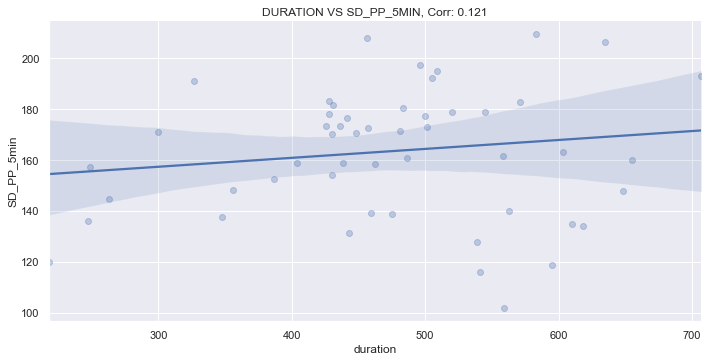

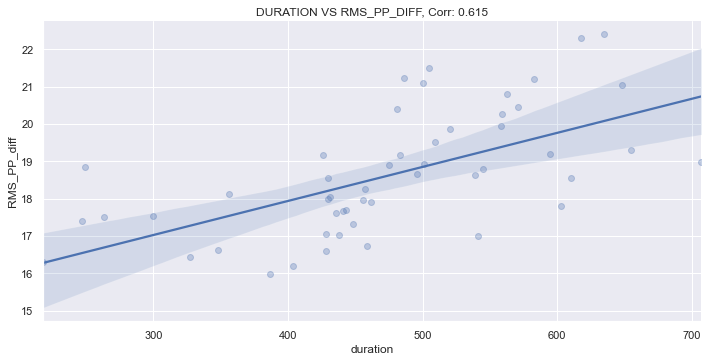

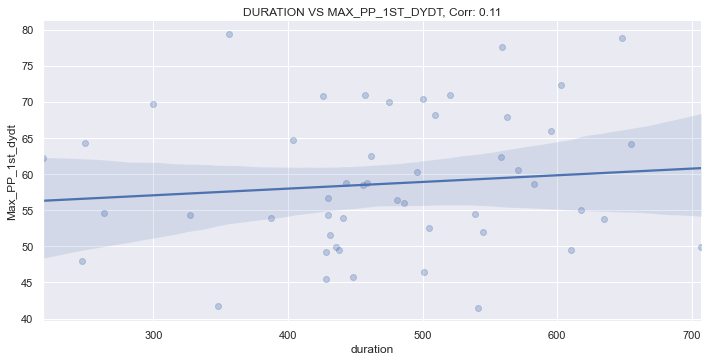

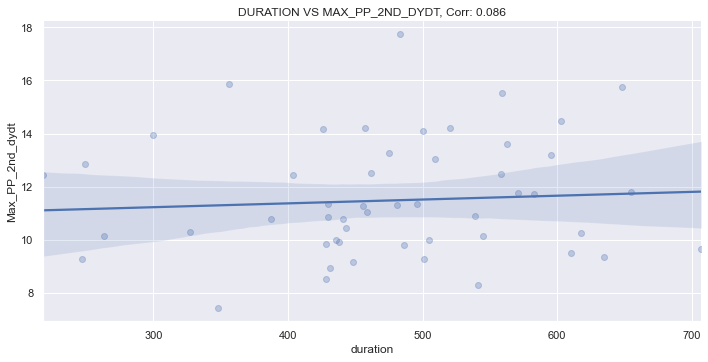

In [14]:
# Seaborn Scatter Plot for linear regression:

for i, DATA in enumerate(list_plot): # applying the same steps for PERSON1 and PERSON2.
    if i == 0:
        num = 1
        print('\nPERSON {}:'.format(1),'\n'+'='*10)
    elif i == len(hrv_cols):
        num = num + 1
        print('\nPERSON {}:'.format(num),'\n'+'='*10)
        
    sns.lmplot(DATA.columns[0],DATA.columns[1],data=DATA,robust=True,aspect=2,scatter_kws={'alpha':0.3})

    # Finding Correlation:
    Corr_value = DATA.corr().iloc[0,1] # the .corr() method returns a matrix of corr values.
    plt.title(str(DATA.columns[0]).upper()+' VS '+str(DATA.columns[1]).upper()+', Corr: '+ str(round(Corr_value,3)))

    plt.show()


#### Using IQR to Exclude Outliers

In [15]:
# Excluding outliers (outside of 3*IQR)

list_plot = [] # define empt list to store DF for plotting later.

for i, subject in enumerate(PERSON_LIST): # applying the same steps for PERSON1 and PERSON2.
     for col in hrv_cols:
        # INPUT X & Y SERIES:
        x_plot = subject.df_sleep_durations.duration.sort_index().copy()
        y_plot = subject.df_hrv_stats_full_day[col].copy()

        # Finding the inter-quantile range (IQR) between 25th and 75th percentile:

        # For X:
        X_Q1 = np.percentile(x_plot,25)
        X_Q3 = np.percentile(x_plot,75)
        X_IQR = X_Q3 - X_Q1

        # For Y:
        Y_Q1 = np.percentile(y_plot,25)
        Y_Q3 = np.percentile(y_plot,75)
        Y_IQR = Y_Q3 - Y_Q1

        # Finding the points outside of 1.5*IQR from Q1 and Q3
        new_x_plot = x_plot[(x_plot >= X_Q1-1.5*X_IQR) & (x_plot <= X_Q3+1.5*X_IQR)]
        new_y_plot = y_plot[(y_plot >= Y_Q1-1.5*Y_IQR) & (y_plot <= Y_Q3+1.5*Y_IQR)]

        # Match all points and Save into Dict to prep for Seaborn plotting:
        DATA_after = pd.concat([new_x_plot,new_y_plot],axis=1).dropna()

        list_plot.append(DATA_after)


PERSON 1: 


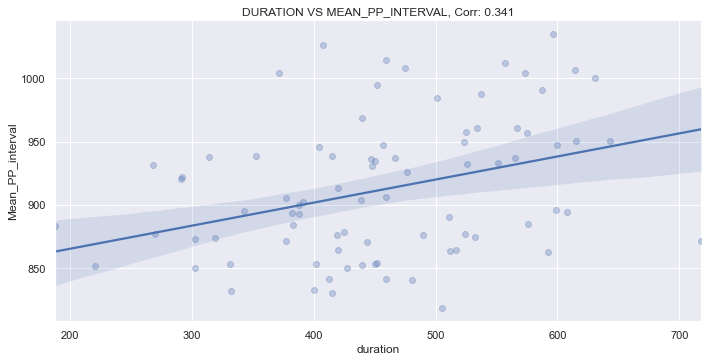

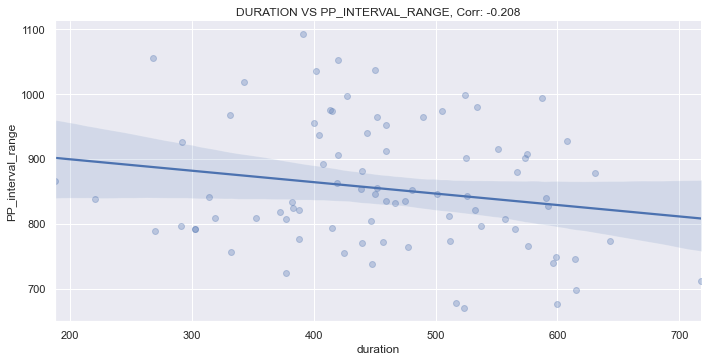

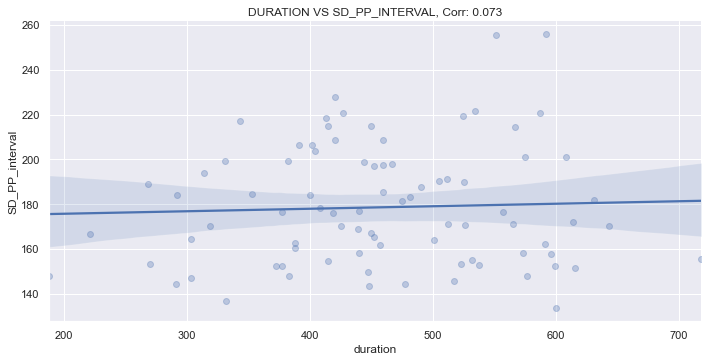

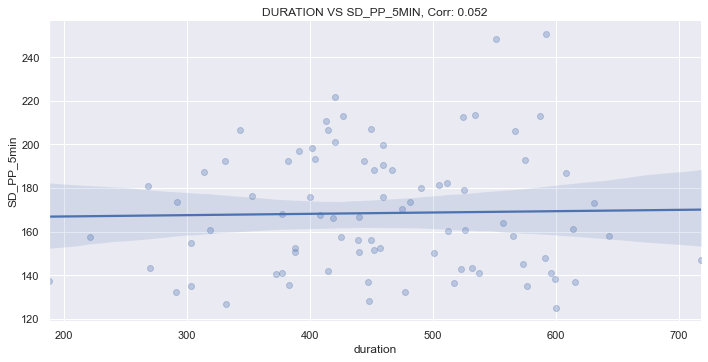

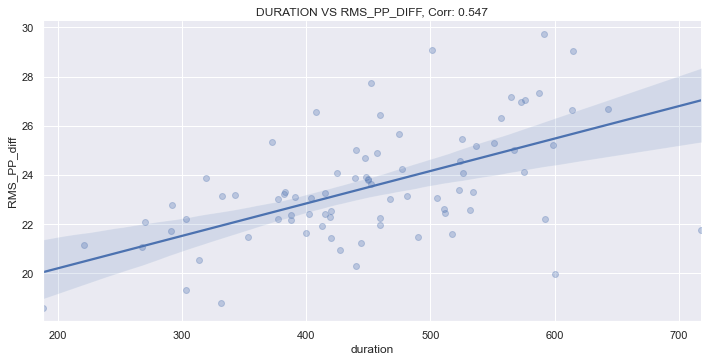

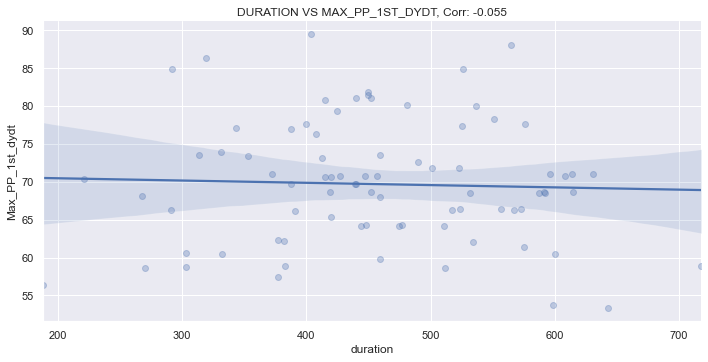

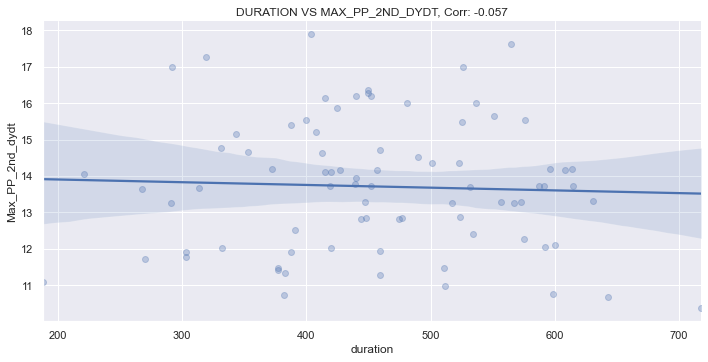


PERSON 2: 


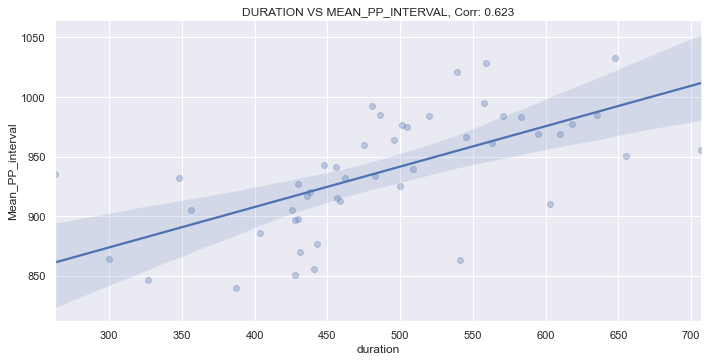

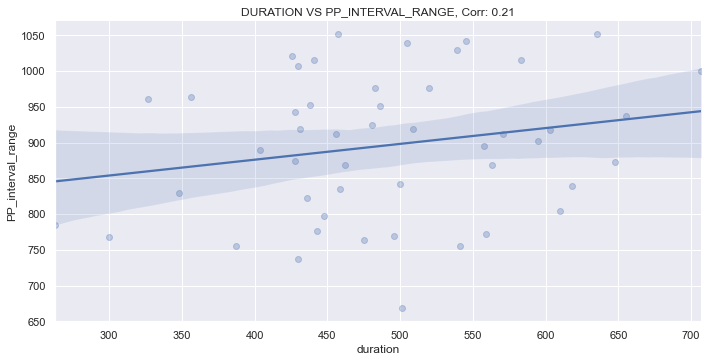

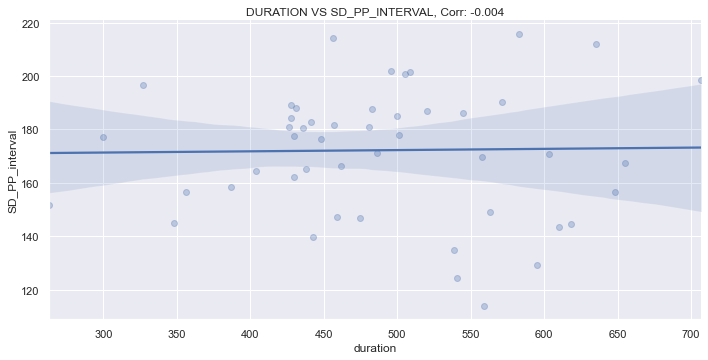

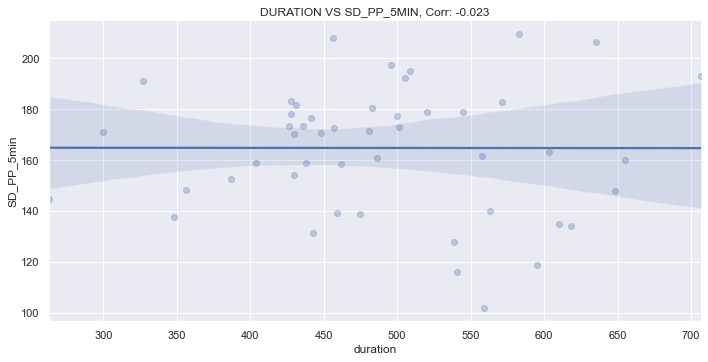

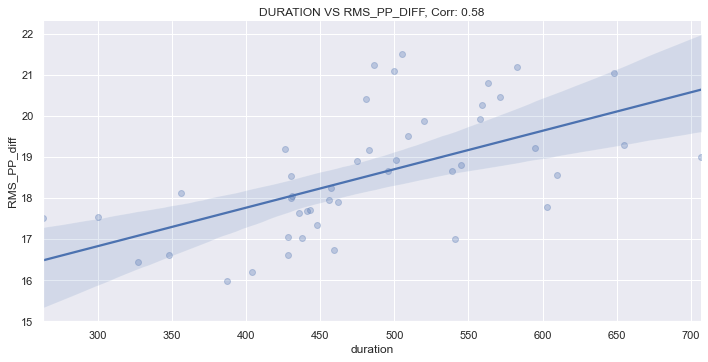

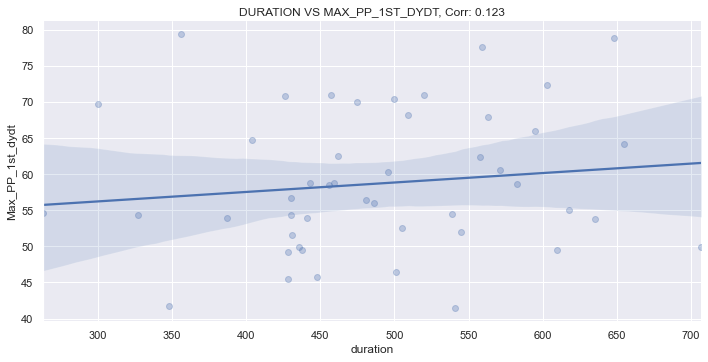

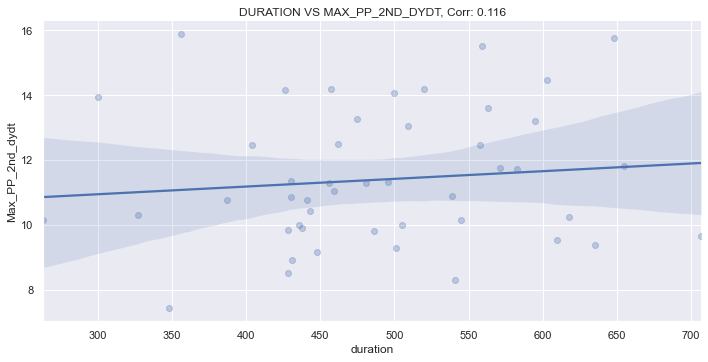

In [16]:
# Seaborn Scatter Plot for linear regression:
num = 0
for i, DATA in enumerate(list_plot): # applying the same steps for PERSON1 and PERSON2.
    if i == 0 or i == len(hrv_cols):
        num = num + 1
        print('\nPERSON {}:'.format(num),'\n'+'='*10)
    
    sns.lmplot(DATA.columns[0],DATA.columns[1],data=DATA,robust=True,aspect=2,scatter_kws={'alpha':0.3})

    # Finding Correlation:
    Corr_value = DATA.corr().iloc[0,1] # the .corr() method returns a matrix of corr values.
    plt.title(str(DATA.columns[0]).upper()+' VS '+str(DATA.columns[1]).upper()+', Corr: '+ str(round(Corr_value,3)))

    plt.show()


As shown in the above plots, the correlation for Sleep Durations with:
- Mean PP interval was significantly positive for both (0.3 for PERSON1, 0.6 for PERSON2), Thus the duration is negatively related to Heart Rate.
- PP interval range was Negative for PERSON1 and Positive for PERSON2
- SD PP Interval and SD in 5 min grouping was Negligible for both person
- RMS successive difference is significantly Positive for both person (0.5)
- Max 1st and 2nd Derivative of PP intervals was undetermined, slightly negative for PERSON1, slightly positive for PERSON2.

### Difference between using IQR and Z-Score to find outliers

The difference between the above two methods is that IQR follows the percentiles which is not dependent on the "Shape" of distribution. Whereas Z-score calculates how many SD away a point is from the Mean value as the center value. Thus it may produce more outliers is the dataset is skewed to either side, it also means that the distribution has to be "Normal". In this case, using IQR would be better as the distribution may not be necessary Normal.

### Using ln(RMS_PP) to compare correlations

In some papers, it was mentioned that RMSSSD did not have a linear range and thus it will be better to observe the relationship using ln(RMS).


PERSON 1: 


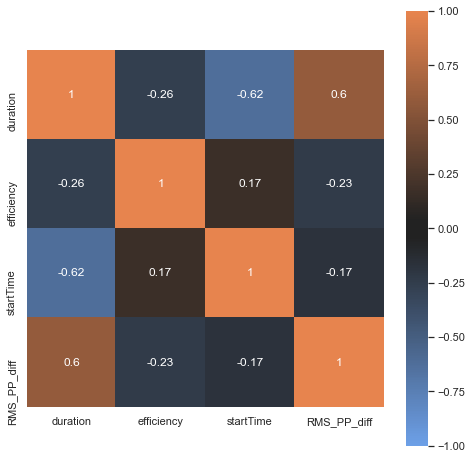


PERSON 2: 


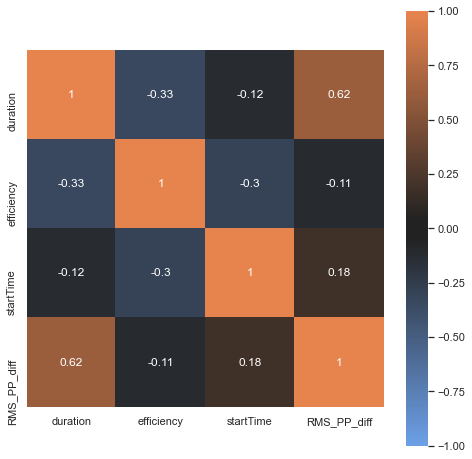

In [17]:
for i, subject in enumerate(PERSON_LIST):

    print('\nPERSON {}:'.format(i+1),'\n'+'='*10)
    
    pd_ln_RMS_PP = np.log(subject.df_hrv_stats_full_day['RMS_PP_diff'])
    
    DATA = pd.concat([subject.df_sleep_durations[sleep_cols],pd_ln_RMS_PP]
                    , axis=1)
 
    sns.set(rc={'figure.figsize':(8,8)})

    CMAP = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True) # define the color scheme

    sns.heatmap(DATA.corr(),vmin=-1.0,vmax=1.0,cmap=CMAP,annot=True, square=True)

    plt.show()

There is not difference in observation from without applying the Ln. The correlation did increased a bit. Sleep efficiency had a slightly negative correlation with the RMS_PP_diff.

In conclusion, Sleep Durations shown to be a factor in improving the heart health.